In [2]:
# import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read image as grayscale

Shape:  (412, 412)


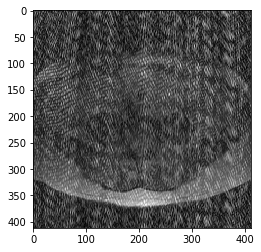

In [3]:
# read image as grayscale
img = cv2.imread('medical.jpg', 0)
print("Shape: ", img.shape)
plt.imshow(img, cmap='gray');

### Convert to Frequency domain and shift to center

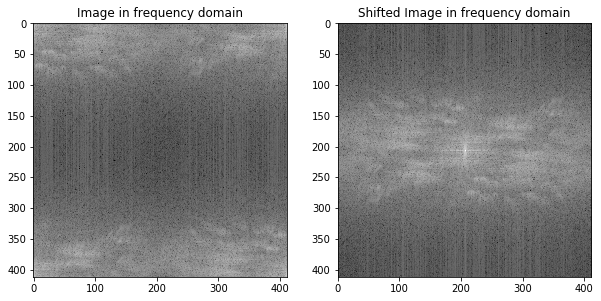

In [14]:
# Calculate dft
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
magnitude_spectrum = 40*np.log(cv2.magnitude(dft[:,:,0],dft[:,:,1]))

# Shift dft
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum_shifted = 10*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

# Plot dft
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(magnitude_spectrum, cmap='gray');
axs[0].set_title('Image in frequency domain');
axs[1].imshow(magnitude_spectrum_shifted, cmap='gray');
axs[1].set_title('Shifted Image in frequency domain');

### Search for peaks

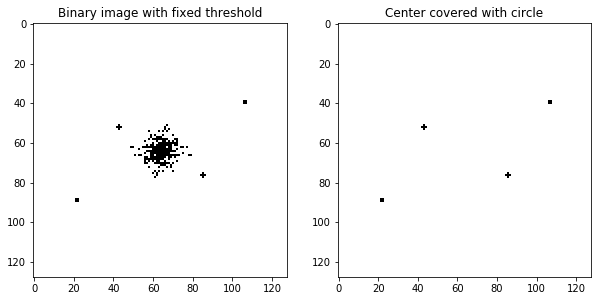

In [4]:
ret,thresh = cv2.threshold(magnitude_spectrum_shifted,200,255,cv2.THRESH_BINARY_INV)
width, height = thresh.shape[0]/2, thresh.shape[1]/2

# Plot
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(thresh, cmap='gray');
axs[0].set_title('Binary image with fixed threshold');

thresh_circle = cv2.circle(thresh,(int(width), int(height)), 18, (255,255,255), -1)
axs[1].imshow(thresh_circle, cmap='gray');
axs[1].set_title('Center covered with circle');


### Draw circles at periodic peaks

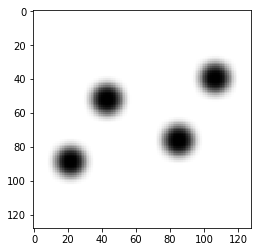

In [5]:
# Get coordinates of peaks
coordinates = np.where(thresh_circle < 1)
listOfCoordinates= list(zip(coordinates[1], coordinates[0]))

for c in listOfCoordinates:
    thresh_circle = cv2.circle(thresh_circle,c, 8, (0,0,0), -1)
thresh_circle = cv2.GaussianBlur(thresh_circle,(11,11),3)

plt.imshow(thresh_circle, cmap = 'gray');

### Create mask for frequency domain

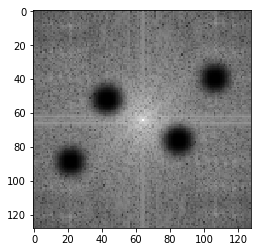

In [6]:
rows, columns = img.shape
mask = np.ones((rows, columns, 2))

for i in range(rows):
    for j in range(columns):
        mask[i, j] = thresh[i][j]
        
masked_spectrum = thresh_circle*magnitude_spectrum_shifted
plt.imshow(masked_spectrum, cmap='gray');

### Multiply and convert back to spatial domain

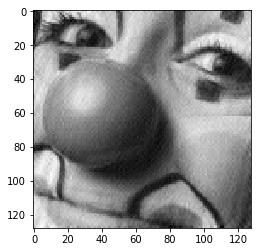

In [9]:
# Multiply
fshift = np.multiply(mask, dft_shift)

# Shift back to origin
f_ishift = np.fft.ifftshift(fshift)

# Inverse Discrete Fourier Transform
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.imshow(img_back, cmap = 'gray');

### Complete Process

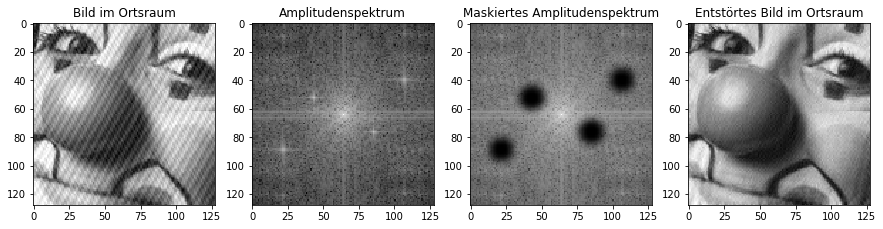

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(15, 15))
axs[0].imshow(img, cmap='gray');
axs[0].set_title('Bild im Ortsraum');
axs[1].imshow(magnitude_spectrum_shifted, cmap='gray');
axs[1].set_title('Amplitudenspektrum');
axs[2].imshow(masked_spectrum, cmap='gray');
axs[2].set_title('Maskiertes Amplitudenspektrum');
axs[3].imshow(img_back, cmap='gray');
axs[3].set_title('Entstörtes Bild im Ortsraum');

plt.savefig('Clown_artifact_reduced.png')